In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
import plotly.express as px

%matplotlib inline

df = pd.read_csv('../data/raw_analyst_ratings.csv/raw_analyst_ratings.csv')
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
df.info()
df.describe()

# Check for null values
df.isnull().sum()

# Quick look at all columns
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

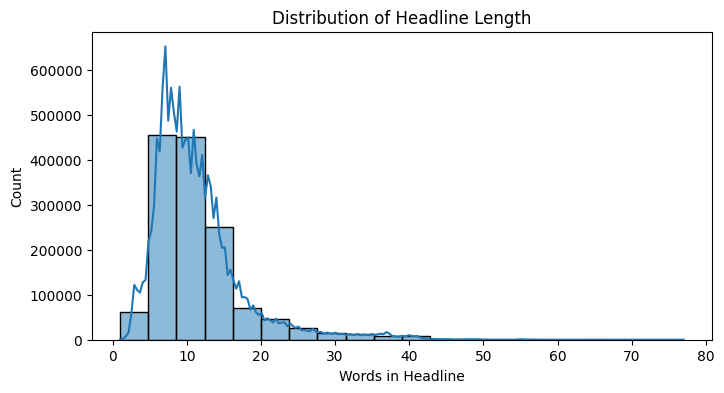

In [5]:
# Add a column for headline length
df['headline_length'] = df['headline'].apply(lambda x: len(str(x).split()))

# Basic stats on headline length
df['headline_length'].describe()

# Plot histogram
plt.figure(figsize=(8,4))
sns.histplot(df['headline_length'], bins=20, kde=True)
plt.title('Distribution of Headline Length')
plt.xlabel('Words in Headline')
plt.show()


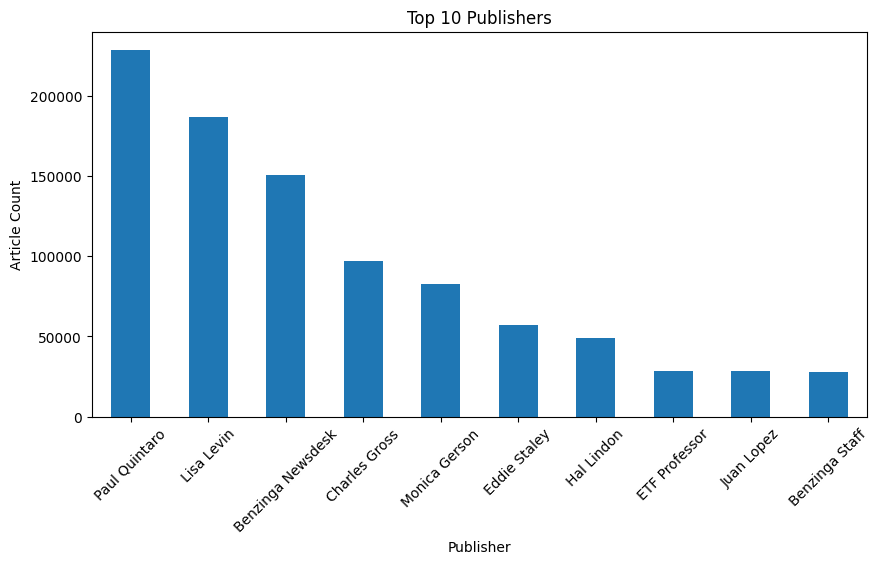

In [6]:
top_publishers = df['publisher'].value_counts().head(10)
top_publishers.plot(kind='bar', figsize=(10,5), title="Top 10 Publishers")
plt.xlabel("Publisher")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.show()


In [8]:
print(df['date'].head())


0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object


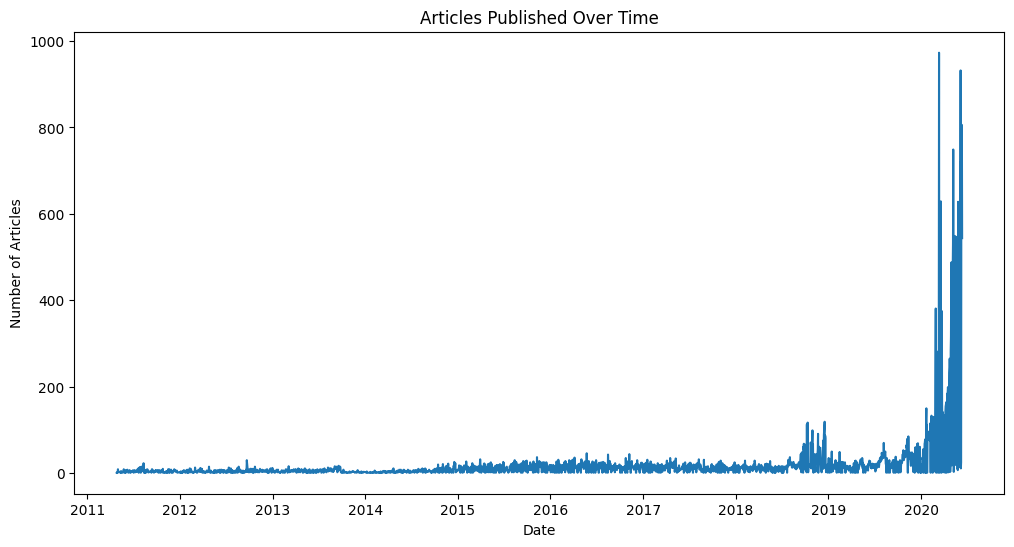

In [12]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
articles_per_day = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(12,6))
articles_per_day.plot()
plt.title("Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()


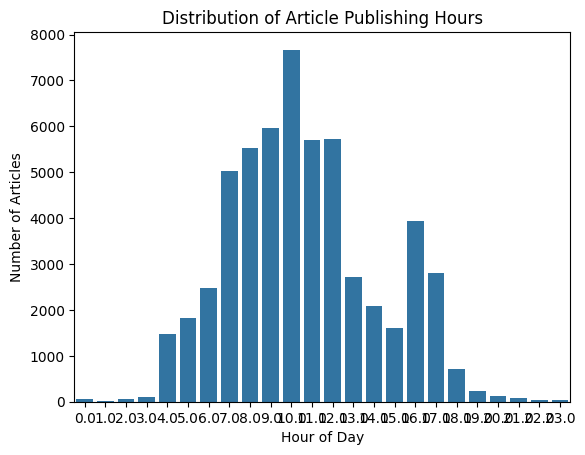

In [13]:
df['hour'] = df['date'].dt.hour

sns.countplot(x='hour', data=df)
plt.title("Distribution of Article Publishing Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Articles")
plt.show()


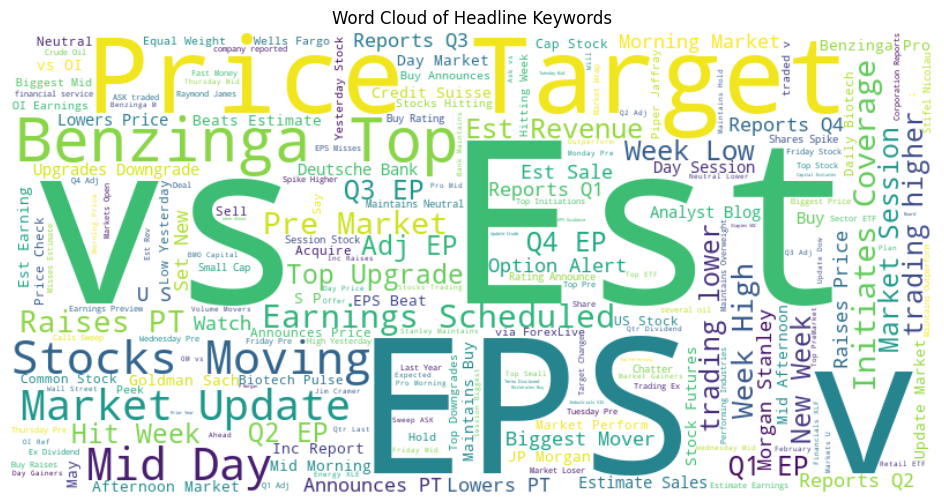

In [14]:
all_headlines = ' '.join(df['headline'].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_headlines)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Headline Keywords")
plt.show()


In [15]:
# Extract domains if publisher field has email format
df['publisher_domain'] = df['publisher'].str.extract(r'@(\w+\.\w+)', expand=False)

# Show top domains
df['publisher_domain'].value_counts().head(10)


publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64